In [19]:
# Import libraries and dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Childhood Respiratory Disease

Keywords: polynomial regression, multiple regression.

## Description

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. The data are part of a larger study to follow the change in pulmonary function over time in children.

ID	 - 	ID number
Age	 - 	years
FEV	 - 	litres
Height	 - 	inches
Sex	 - 	Male or Female
Smoker	 - 	Non = nonsmoker, Current = current smoker


## Source

Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.


In [9]:
# Read the csv file into a pandas DataFrame

smoking = pd.read_csv('smoking.csv')
smoking.head()

,Id,Age,FEV,Height,Sex,Smoker
0,301,9,1.708,57.0,Female,Non
1,451,8,1.724,67.5,Female,Non
2,501,7,1.720,54.5,Female,Non
3,642,9,1.558,53.0,Male,Non
4,901,9,1.895,57.0,Male,Non


In [10]:
# Use Pandas get_dummies to convert categorical data

smoking = pd.get_dummies(smoking)

smoking.head()

,Id,Age,FEV,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
0,301,9,1.708,57.0,1,0,0,1
1,451,8,1.724,67.5,1,0,0,1
2,501,7,1.720,54.5,1,0,0,1
3,642,9,1.558,53.0,0,1,0,1
4,901,9,1.895,57.0,0,1,0,1


In [11]:
# Assign X (data) and y (target)

X = smoking[["Id", "Age", "Height", "Sex_Female", "Sex_Male", "Smoker_Current", "Smoker_Non"]]
y = smoking["FEV"].values.reshape(-1, 1)
print(X.shape, y.shape)

(654, 7) (654, 1)


In [12]:
# Split the data into training and testing

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

X_train.head()

C:\Users\JBTD9\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Id,Age,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
334,5251,11,67.0,1,0,0,1
94,22201,8,60.0,1,0,0,1
180,43242,7,47.0,0,1,0,1
301,81451,9,59.5,1,0,0,1
451,33041,12,70.0,0,1,0,1


In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [15]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

ValueError: x and y must be the same size

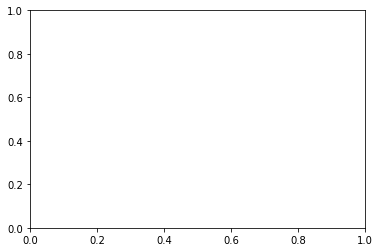

In [21]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)

plt.scatter(X_test_scaled, y_test_scaled)


In [ ]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

# YOUR CODE HERE

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

# YOUR CODE HERE

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

# YOUR CODE HERE

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

# YOUR CODE HERE

print(f"MSE: {MSE}, R2: {r2}")